### Problem statement

With rise of social media coupled with the Covid-19 pandemic, cyberbullying has reached all time highs. We can combat this by creating models to automatically flag potentially harmful tweets as well as break down the patterns of hatred

### About Dataset


As social media usage becomes increasingly prevalent in every age group, a vast majority of citizens rely on this essential medium for day-to-day communication. Social media’s ubiquity means that cyberbullying can effectively impact anyone at any time or anywhere, and the relative anonymity
of the internet makes such personal attacks more difficult to stop than traditional bullying.

On April 15th, 2020, UNICEF issued a warning in response to the increased risk of cyberbullying during the COVID-19 pandemic due to widespread school closures, increased screen time, and decreased face-to-face social interaction. The statistics of cyberbullying are outright alarming: 36.5% of middle and high school students have felt cyberbullied and 87% have observed cyberbullying, with effects ranging from decreased academic performance to depression to suicidal thoughts.

In light of all of this, this dataset contains more than 47000 tweets labelled according to the class of cyberbullying:

Age;

Ethnicity;

Gender;

Religion;

Other type of cyberbullying;

Not cyberbullying

The data has been balanced in order to contain ~8000 of each class.

In [71]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
df = pd.read_csv('/content/cyberbullying_tweets.csv')
df.head()


tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

In [74]:
df.shape

(47692, 2)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB



# Exploratory Data Analysis

In [70]:
df['cyberbullying_type'].value_counts()

0.0    7998
2.0    7973
4.0    7945
5.0    4931
Name: cyberbullying_type, dtype: int64

([<matplotlib.patches.Wedge at 0x7f66375f20d0>,
 [Text(1.0372751765031376, 0.6033740201652579, 'religion '),
  Text(-0.010289112228893867, 1.0999518781153752, 'age'),
  Text(-1.0474178509565466, 0.5855901685458608, 'gender'),
  Text(-0.9435783150757331, -0.5653847922599623, 'ethnicity'),
  Text(0.02015597537671468, -1.1998307116658637, 'not_cyberbullying'),
  Text(0.9571480988601195, -0.5420954868364604, 'other_cyberbullying')],
 [Text(0.6050771862934968, 0.35196817842973377, '16.8%'),
  Text(-0.005612243033942108, 0.5999737516992956, '16.8%'),
  Text(-0.6109937463913189, 0.3415942649850854, '16.7%'),
  Text(-0.5146790809503998, -0.3083917048690703, '16.7%'),
  Text(0.011757652303083562, -0.6999012484717538, '16.7%'),
  Text(0.5220807811964288, -0.295688447365342, '16.4%')])

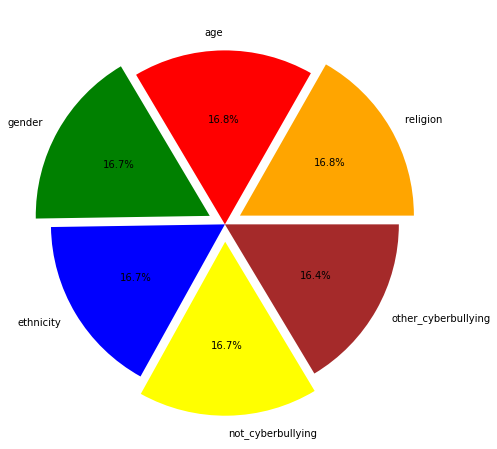

In [ ]:
# Class Distribution

plt.figure(figsize=(13, 8))
labels = ['religion ', 'age' , 'gender' , 'ethnicity' , 'not_cyberbullying' , 'other_cyberbullying']
explode = [.1, 0 , .1 , 0 , .1 , 0]
mycolors = ['Orange', 'Red' , 'green' , 'blue' , 'yellow' , 'brown']
sizes = df['cyberbullying_type'].value_counts().values

plt.pie(x = sizes, explode = explode, labels = labels, colors = mycolors, autopct = "%1.1f%%")


Balance distribution among all classes

### Data preprocessing

In [76]:
df['tweet_text'][3]


'@Jason_Gio meh. :P  thanks for the heads up, but not too concerned about another angry dude on twitter.'

In [77]:
#tweet-preprocessor: Preprocessor is a preprocessing library for tweet data written in Python

!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
import preprocessor as p
#forming a separate feature for cleaned tweets
def preprocess_tweet(row):
    text = row['tweet_text']
    text = p.clean(text)
    return text

In [79]:
df['tweet_text'] = df.apply(preprocess_tweet, axis=1)

In [80]:

df['tweet_text'][3]

'meh. thanks for the heads up, but not too concerned about another angry dude on twitter.'

#### Removing Punctuation

In [81]:

def remove_punc(text):
  trans = str.maketrans('', '', string.punctuation)
  return text.translate(trans)

In [82]:
df['tweet_text'] = df['tweet_text'].apply(remove_punc)

In [83]:
df['tweet_text'][3]

'meh thanks for the heads up but not too concerned about another angry dude on twitter'




#### Remove Stopwords

In [84]:



import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [85]:
from nltk.corpus import stopwords

In [86]:
sw = stopwords.words('english')

In [87]:
len(sw)

179

In [88]:
def remove_sws(text):
  s = [word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(s)

In [89]:
df['tweet_text'] = df['tweet_text'].apply(remove_sws)

In [90]:




df['tweet_text'][3]

'meh thanks heads concerned another angry dude twitter'

Converting Upper case to Lower case

In [91]:
df['tweet_text'] = df['tweet_text'].str.lower()

In [92]:
df['tweet_text'][3]

'meh thanks heads concerned another angry dude twitter'

Lemmatization

In [93]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [94]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma(text):
  l = [lemmatizer.lemmatize(word) for word in text.split()]
  return " ".join(l)

In [95]:


df['tweet_text'] = df['tweet_text'].apply(lemma)

In [96]:


df['tweet_text'][3]

'meh thanks head concerned another angry dude twitter'

In [97]:
data =df.copy()

In [98]:
data.head()

tweet_text cyberbullying_type
0                             word food crapilicious  not_cyberbullying
1                                              white  not_cyberbullying
2                    classy whore red velvet cupcake  not_cyberbullying
3  meh thanks head concerned another angry dude t...  not_cyberbullying
4  isi account pretending kurdish account like is...  not_cyberbullying

Word Cloud

In [99]:
religion = df[df.cyberbullying_type == 'religion'].tweet_text
age = df[df.cyberbullying_type == 'age'].tweet_text
gender = df[df.cyberbullying_type == 'gender'].tweet_text
ethnicity = df[df.cyberbullying_type == 'ethnicity'].tweet_text
not_cyberbullying = df[df.cyberbullying_type == 'not_cyberbullying'].tweet_text
other_cyberbullying = df[df.cyberbullying_type == 'other_cyberbullying'].tweet_text



In [100]:
religion

15918    sudeep invite though right getting worded your...
15919    islam never resistance oppression always sourc...
15920    boy comment journalist wanting keep church clo...
15921    hindu getting killed muslim terriorists kashmi...
15922    white supremicists many know idiot race antise...
                               ...                        
23911    imagine christian came together like time day ...
23912    support justice initial problem morphed became...
23913    harbour doubt muslim believe sharia note data ...
23914    one thing muslim want exterminate everyone mus...
23915    quran precludes woman human right adherent wha...
Name: tweet_text, Length: 7998, dtype: object

### Plot Using Word Cloud

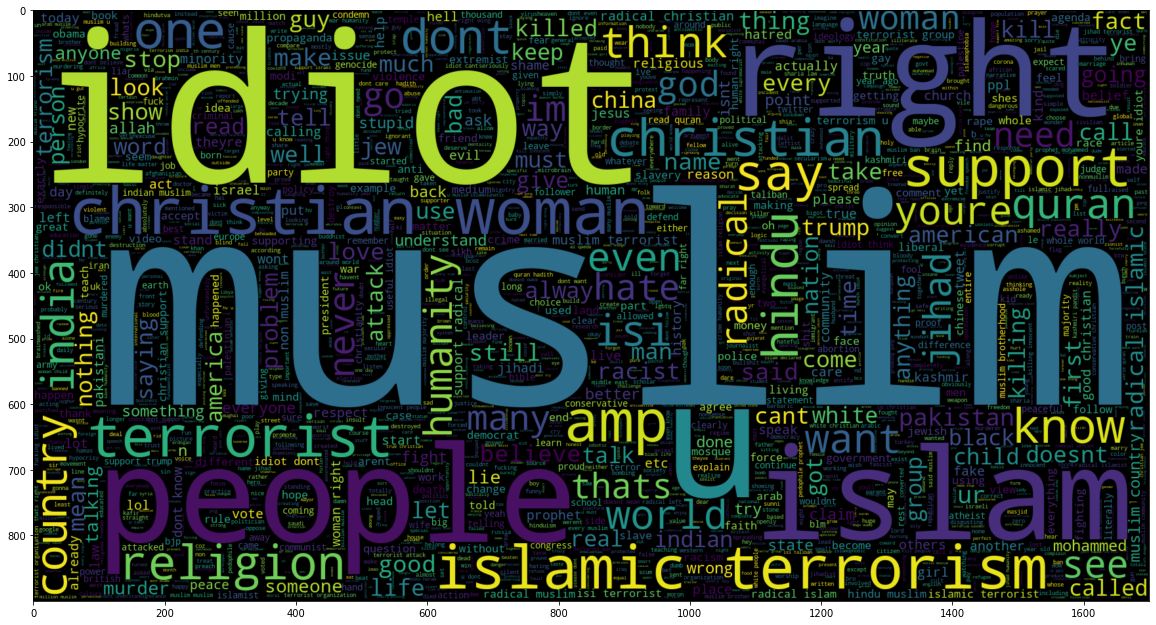

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1700, height = 900, max_words = 2500).generate(" ".join(religion))
plt.imshow(wc, interpolation='bilinear')

Cyberbulling in the case of religion are mostly related to muslim , islam, terrorism followed by hinduband christian words

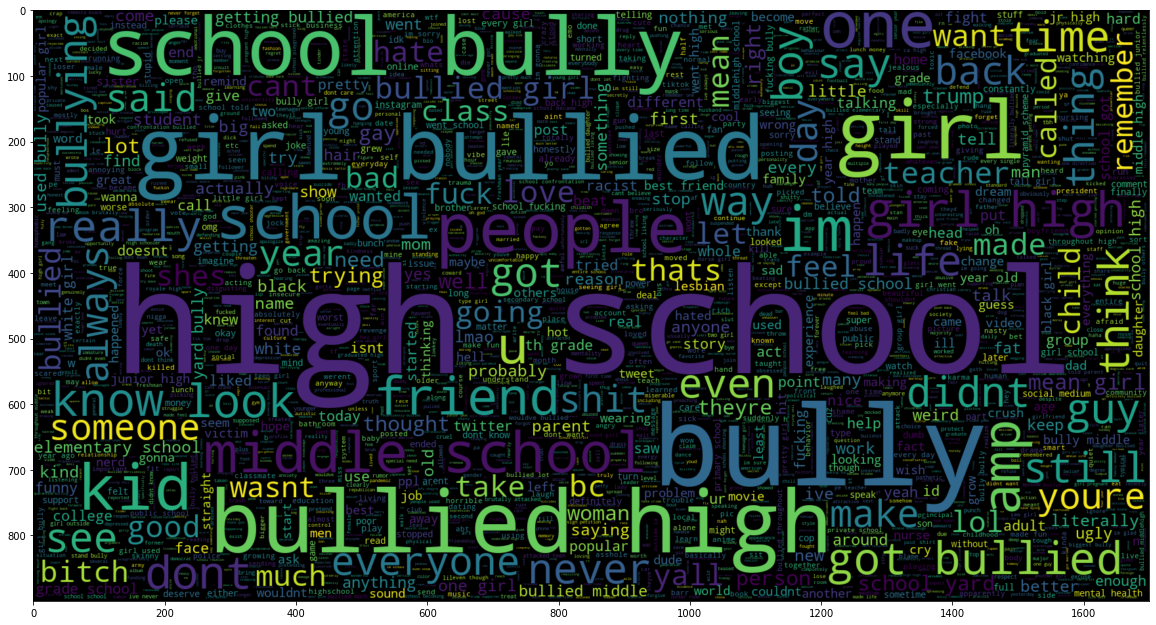

In [ ]:

plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1700, height = 900, max_words = 2500).generate(" ".join(age))
plt.imshow(wc, interpolation='bilinear')

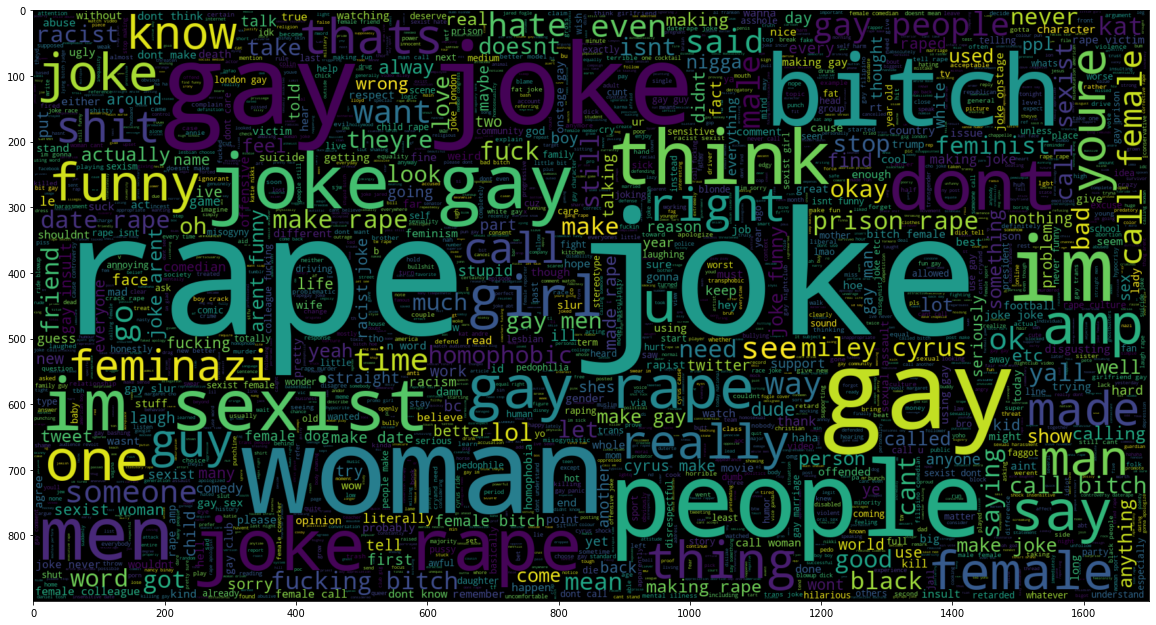

In [ ]:

plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1700, height = 900, max_words = 2500).generate(" ".join(gender))
plt.imshow(wc, interpolation='bilinear')

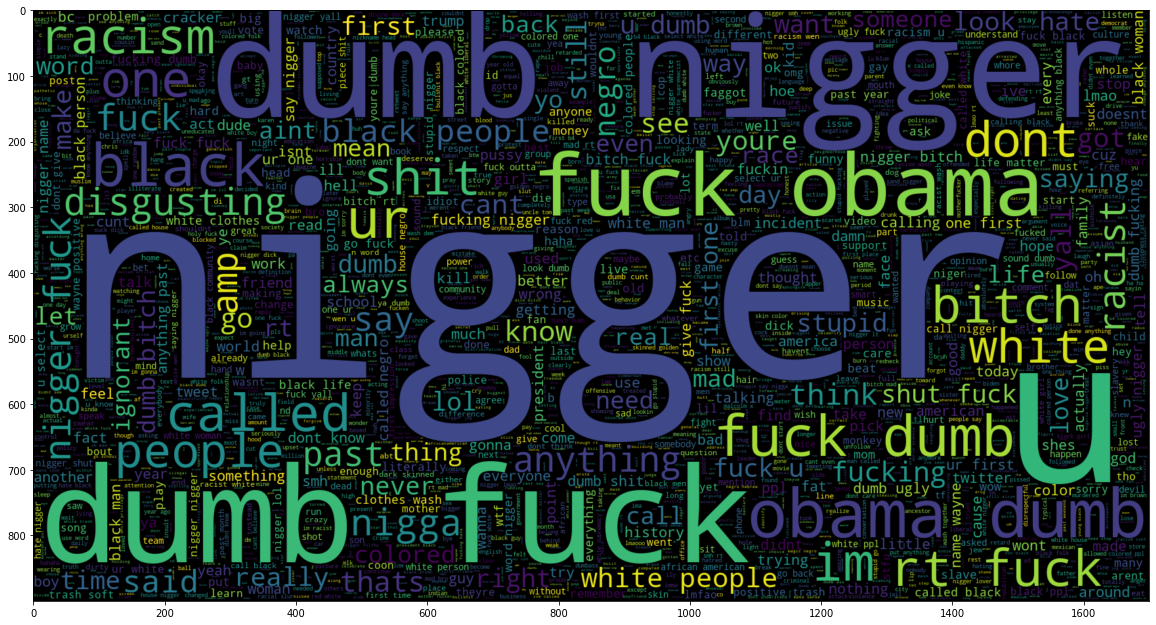

In [ ]:

plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1700, height = 900, max_words = 2500).generate(" ".join(ethnicity))
plt.imshow(wc, interpolation='bilinear')

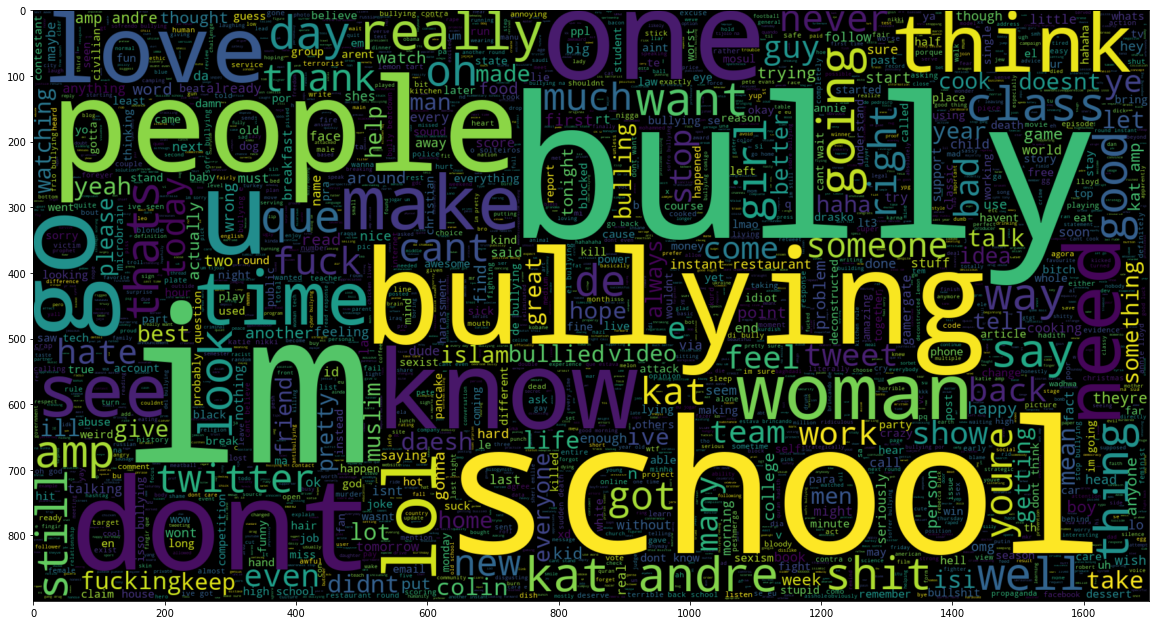

In [ ]:

plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1700, height = 900, max_words = 2500).generate(" ".join(not_cyberbullying))
plt.imshow(wc, interpolation='bilinear')

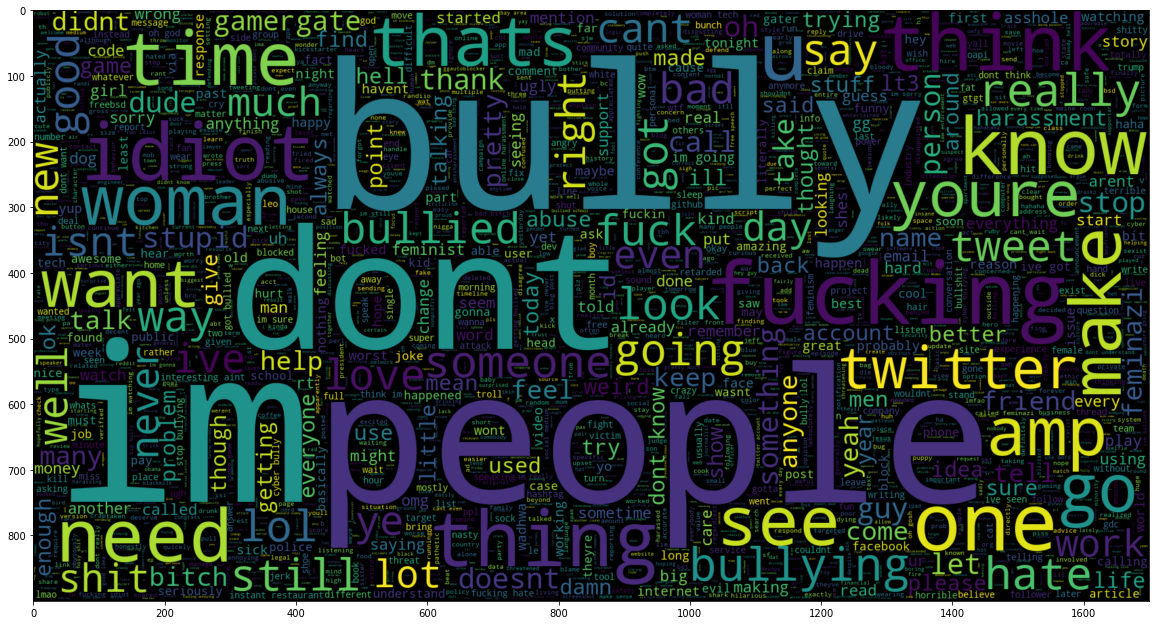

In [ ]:
plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1700, height = 900, max_words = 2500).generate(" ".join(other_cyberbullying))
plt.imshow(wc, interpolation='bilinear')

### Feature Engineering

In [101]:
# we replace character type values into int by replace function

df['cyberbullying_type'] = df['cyberbullying_type'].replace({'religion': 0,
                                                            'age': 1, 'gender' : 2, 'ethnicity': 3,
                                                             'not_cyberbullying': 4, 'other_cyberbullying':5})


In [102]:
df.head()

tweet_text  cyberbullying_type
0                             word food crapilicious                   4
1                                              white                   4
2                    classy whore red velvet cupcake                   4
3  meh thanks head concerned another angry dude t...                   4
4  isi account pretending kurdish account like is...                   4

In [103]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 745.3+ KB


In [104]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 2000)


In [105]:
X = tfidf.fit_transform(df['tweet_text']).toarray()
y = df['cyberbullying_type']

In [106]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [107]:
X = pd.DataFrame(X)

In [108]:
X

0     1     2     3     4     5     6     7     8     9     ...  1990  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
47687   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
47688   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
47689   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
47690   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
47691   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       1991  1992  1993      1994  1995  1996  1997  1998  1999  
0       0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  
1       0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  
2       0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  
3       0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  
4       0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...       ...   ...   ...   ...   ...   ...  
47687   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  
47688   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  
47689   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  
47690   0.0   0.0   0.0  0.260213   0.0   0.0   0.0   0.0   0.0  
47691   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  

[47692 rows x 2000 columns]

### Model Building And Evaluation

In [109]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


In [110]:
## Data Splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

### Logistic Regression

In [111]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)
logistic_predict=logistic_model.predict(X_test)
print(classification_report(y_test,logistic_predict))
print(confusion_matrix(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1538
           1       0.94      0.97      0.95      1605
           2       0.89      0.81      0.85      1602
           3       0.97      0.97      0.97      1624
           4       0.56      0.55      0.56      1632
           5       0.56      0.62      0.59      1538

    accuracy                           0.81      9539
   macro avg       0.81      0.81      0.81      9539
weighted avg       0.81      0.81      0.81      9539

[[1448    0    8    4   48   30]
 [   1 1550    3    2   21   28]
 [   8    7 1293   10  155  129]
 [   4    2    8 1582   13   15]
 [  43   69   64   16  903  537]
 [   9   21   76   15  469  948]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest

In [112]:
# RANDOM FORESTS
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)

rf_model.fit(X_train, y_train)
preds_rf_model = rf_model.predict(X_test)
print(classification_report(y_test, preds_rf_model))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1538
           1       0.98      0.97      0.98      1605
           2       0.87      0.84      0.85      1602
           3       0.98      0.98      0.98      1624
           4       0.55      0.46      0.50      1632
           5       0.51      0.63      0.56      1538

    accuracy                           0.80      9539
   macro avg       0.81      0.80      0.81      9539
weighted avg       0.81      0.80      0.81      9539



In [113]:
# Model
from sklearn.svm import SVC
svm_model = SVC(kernel= 'linear', C = 7)

svm_model.fit(X_train, y_train)
svm_predictions  = svm_model.predict(X_test)


In [ ]:
print(classification_report(y_test,svm_predictions))
print(confusion_matrix(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1538
           1       0.95      0.97      0.96      1605
           2       0.88      0.81      0.84      1602
           3       0.97      0.98      0.97      1624
           4       0.57      0.54      0.55      1632
           5       0.55      0.63      0.59      1538

    accuracy                           0.81      9539
   macro avg       0.81      0.81      0.81      9539
weighted avg       0.81      0.81      0.81      9539

[[1452    0    6    5   40   35]
 [   1 1558    3    2   16   25]
 [  13    6 1292   11  150  130]
 [   3    4    7 1586   10   14]
 [  42   61   69   16  875  569]
 [   5   11   91   15  454  962]]


### Testing Model (Predictions)

In [ ]:
 example = np.zeros(100)
example = ['Attention Christian Zionist Idiots: The Ten Commandments do not apply to non-Jews. Fake Jews can murder Palestinian Christians and Muslims or steal or destroy their property because you support evil.']
example = tfidf.transform(example)
example

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [ ]:
logistic_model.predict(example)

array([0])

In [ ]:
 example = np.zeros(100)
example = ['also hard take company seriously harassment game rape joke amp gay joke treat woman way']
example = tfidf.transform(example)
example

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [ ]:
logistic_model.predict(example)

array([2])

In [ ]:
rf=data[data['cyberbullying_type']=='ethnicity']

In [ ]:
rf.head()

tweet_text cyberbullying_type
39731  hey dumb fuck celebs stop something people pub...          ethnicity
39732          fuck u bitch rt fuck obama dumb as nigger          ethnicity
39733  joe racist many video audio clip racist shit s...          ethnicity
39734  truck look dumb fuck trying make look worse ai...          ethnicity
39735                  nigger food cafe today disgusting          ethnicity

In [ ]:
rf['tweet_text'][39735]

'nigger food cafe today disgusting'

In [ ]:
 example = np.zeros(100)
example = ['nigger food cafe today disgusting']
example = tfidf.transform(example)
example

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [ ]:
logistic_model.predict(example)

array([3])